<h1><center> <ins><b> K-Means Clustering Algorithm </b></ins></center></h1>

## <ins>What is K-Means Clustering?</ins>
K-Means Clustering is an unsupervised machine learning algorithm used to cluster data into non-overlapping groups. It is used on unlabelled data (data without defined categories or groups). Let us define some key words now:
- <b>Data points</b> - Our data which we are applying the K-Means Clustering Algorithm onto
- <b>Cluster</b> - This is a group of datapoints
- <b>Centroid</b> - This is the centerpoint of a cluster

This algorithm is an iterative process to minimize the sum of euclidean distances between data points and their cluster centroids. 

## <ins>What are the purposes of K-Means Clustering?</ins>

This algorithm has a variety of uses, ranging from anomaly detection in cybersecurity, to customer segmentation in marketing or to image segmentation when identifying tumors in a body. However, for our case we will focus on the application of it within a financial domain.

In asset management, banks use K-Means Clustering to effectively manage investment portfolios. By segmenting assets based on risk and return profiles, banks can create customized investment strategies that align with the specific needs and risk appetites of different customer segments. This segmentation enables more precise and strategic allocation of assets, potentially improving portfolio performance and customer satisfaction with tailored investment solutions.

Alternatively, this algorithm can be used in identifying paradigm shifts/regime change. As an example, one could be interested in how gold is often considered a hedge against downturns in the stock market. Clustering could help build a trading strategy with a flexible model that is able to identify different regimes for which different approaches would work better.

## <ins>How does K-Means Clustering work?</ins>

To best understand how this algorithm works, we will write below a step-by-step iterative process that can be followed.
1) Firstly, we first decide how many clusters we want to use to group our data. Let us denote this number by $k$.\
2) Then we must initialise our $k$ centroids as our starting points.\
3) Now, we will assign each point to a cluster by finding which centroid it is closest to (ie. minimum euclidean distance to a centroid).\
4) Finally, we will calculate the mean of all points within a cluster and this value will be the new, updated centroid of said cluster.\
5) We repeat steps 3 and 4 until our centroids do not change.

### <ins>Step 1</ins>
There are many methods that can be used to identify the best number of clusters that would best fit our data, we will go over 3 below:
- The easiest yet most limited method, would be to plot and visualise the data and by eye, identify how many obvious clusters there are. Yet obviously, this is limited by scenarios when it is impossible to visualise data in high dimensions or when data is too dense to identify clusters easily by eye.
- The main method used is the **Elbow Method**. This method produces a graph which plots the number of clusters against the respective Within Cluster Sum of Square (WCSS) values. The WCSS measures how well data points are clustered around their respective centroids. It is defined as $$ \text{WCSS} = \sum_{i=1}^{k}\left(\sum_{j=1}^{n}\,d\left(x_{j}^{\left(i\right)},c_{k}\right)\right) $$ where $k$ is the number of clusters, $n$ is the number of data points, and $d\left(x_{j}^{\left(i\right)},c_{i}\right)$ denotes the distance between data point $j$ inside cluster $i$ and the centroid $c_{i}$ of said cluster $i$ (ie. the distance between a datapoint and its closest centroid).<br> As we increase the value of $k$, we should see that the WCSS decreases since by creating more clusters, we capture more data variations. Yet at some point, when increasing $k$, we will only see a marginal decrease in WCSS. This is where we see the **elbow** in our graph. This can be seen in the first plot below. If we use greater values of k, this will result in overfitting so it is crucial that we identify this elbow and take this value of $k$ to be our optimal chosen value of $k$.<br> This method has drawbacks as can be seen in the second plot below. Here, it is incredibly difficult to see where our elbow is by eye, and thus what our value of $k$ should be.

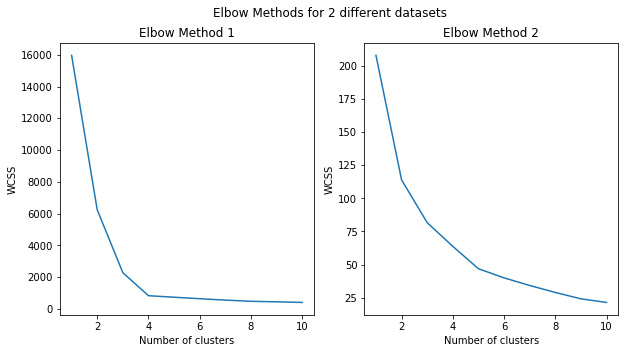

In [23]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
import random
from sklearn.cluster import KMeans

# Creating data
np.random.seed(0)
mean_01 = np.array([0.0, 0.0])
cov_01 = np.array([[1, 0.3], [0.3, 1]])
dist_01 = np.random.multivariate_normal(mean_01, cov_01, 100)

mean_02 = np.array([6.0, 7.0])
cov_02 = np.array([[1.5, 0.3], [0.3, 1]])
dist_02 = np.random.multivariate_normal(mean_02, cov_02, 100)

mean_03 = np.array([7.0, -5.0])
cov_03 = np.array([[1.2, 0.5], [0.5, 1]]) 
dist_03 = np.random.multivariate_normal(mean_03, cov_01, 100)

mean_04 = np.array([2.0, -7.0])
cov_04 = np.array([[1.2, 0.5], [0.5, 1.3]])
dist_04 = np.random.multivariate_normal(mean_04, cov_01, 100)

data = np.vstack((dist_01, dist_02, dist_03, dist_04))
np.random.shuffle(data)
data = pd.DataFrame(data)
data.rename(columns={0: 'col1', 1: 'col2'}, inplace=True)
data

data2 = pd.DataFrame(dist_01)
data2.rename(columns={0: 'col1', 1: 'col2'}, inplace=True)
data2

# Plotting Elbow Graphs
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
fig.suptitle('Elbow Methods for 2 different datasets')
cs = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(data)
    cs.append(kmeans.inertia_)
ax1.plot(range(1, 11), cs)
ax1.set_title('Elbow Method 1')
ax1.set_xlabel('Number of clusters')
ax1.set_ylabel('WCSS')

cs = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(data2)
    cs.append(kmeans.inertia_)
ax2.plot(range(1, 11), cs)
ax2.set_title('Elbow Method 2')
ax2.set_xlabel('Number of clusters')
ax2.set_ylabel('WCSS')
plt.show()

- The alternative method is the **Silhouette Method**. It calculates a score for each point which tells us if the point is well-clustered. A higher score means the point is close to its own cluster and far from others. The Silhouette Score ranges from -1 to +1, where +1 means the point is well-placed in its cluster, 0 means the point is on the boundary between clusters and -1 means the point is in the wrong cluster. We then take the average of all scores for all points and compare this value for different values of $k$. This can be represented mathematically as $$ S = \frac{1}{n}\left(\sum_{i=1}^{n}\frac{b(i)-a(i)}{\text{max}\left(a(i),b(i)\right)}\right) $$ where $n$ is the number of data points, $a(i)$ is the **cohesion** (the average distance from point $i$ to all other points within the same cluster) and $b(i)$ is the **separation** (average distance from point $i$ to all points in the nearest different cluster).<br> Although this can be seen as superior to the elbow method since we have a numeric evaluation, this is more computationally expensive.<br>

Therefore, depending on our situation, we must choose the method that best fits our needs.

### <ins>Step 2</ins>
The next step is to initialise our centroids for the $k$ clusters we have chosen. Many simply randomly choose $k$ data points from the data set, but this has significant drawbacks. It could occur that we pick $k$ points that lie extremely close together and thus, we will not be able to cluster our data appropriately as we will not capture all of the data. Thus, we will use the **K-Means ++ Initialisation**.

This algorithm is as follows:

1) Choose one centroid uniformly at random among the data points.\
2) For each data point $x$ not chosen yet, compute $D(x)$, the distance between $x$ and the nearest centroid that has already been chosen.\
3) Choose one new data point at random as a new centroid, using a weighted probability distribution where a point $x$ is chosen with probability proportional to $D(x)^{2}$.\
4) Repeat Steps 2 and 3 until $k$ centroids have been chosen.

This is seemingly simple, yet we will explore the weighted probability distribution in further detail. We can say $$ P(c_{1} = x) = \frac{1}{n} $$ where $c_{1}$ is Centroid 1, $x$ is a data point and $n$ is the total number of data points. Clearly, this implies the choice of Centroid 1 is a uniformly random choice among all data points. Now let us consider the following centroids $c_{i}$ for any $i\ge2$. We can say $$ P(c_{i} = x) = \alpha\,d^{2} $$ Where $d$ is the distance between the data point $x$ and its nearest centroid. Now since our probability must sum to 1, let us consider the sum of the probabilities for all data points within the dataset. $$ \implies \sum_{j=1}^{n}\,P(c_{i} = x_{j}) = \sum_{j=1}^{n}\,\alpha\,d_{j}^{2} = 1 $$ $$\implies \alpha\,\sum_{j=1}^{n}\,d_{j}^{2} = 1$$ $$\implies \alpha = \frac{1}{\sum_{j=1}^{n}\,d_{j}^{2}}$$ Thus, $$ P(c_{i} = x) = \frac{d^{2}}{\sum_{j=1}^{n}\,d_{j}^{2}}$$
Clearly, this is a valid probability distribution since $\forall i \in k$, $ P(c_{i} = x) \ge 0$ as $\forall j \in n$, $d^{2}, d_{j}^{2} \ge 0$ since distances are positive. And as shown above, total probabilities sum to 1 for each centroid.\
We can see that this is weighted by letting $d_{1}$ and $d_{2}$ be the distances between data points $x_{1}$ and $x_{2}$ and their respective nearest centroids. Without loss of generality, let us assume $d_{1} > d_{2} \implies d_{1}^{2} > d_{2}^{2}$. Using our definition of $P(c_{i} = x)$ above, it is clear that $P(c_{i} = x_{1}) > P(c_{i} = x_{2})$. Therefore, we can conclude that points further away from their nearest centroids are more likely to be chosen as the next following centroid.

### <ins>Step 3</ins>
Following this, we will assign each data point to a cluster. We can do this by calculating the distances between a data point and all $k$ centroids. Then we take the minimum of these distances and that corresponding centroid implies which cluster it will be assigned to.

### <ins>Step 4</ins>
Having assigned each data point to a cluster, we can take all data points within a cluster $i$ and take the mean of them all. This mean will now be the new, updated centroid. We can represent this as $$c_{i} = \frac{1}{n_{i}}\left(\sum_{j=1}^{n_{i}}\,x_{j}\right)$$ where $c_{i}$ is the centroid of cluster $i$, $n_{i}$ is the number of data points and $x_{j}$ are these data points within cluster $i$.

### <ins>Step 5</ins>
We can then repeat steps 3 and 4 iteratively until the position of the centroids do not change, implying that these centroids best fit our data and from this, we can assign data points to each cluster.


## <ins>Drawbacks of K-Means Clustering</ins>
Apart from the disadvantages discussed above in determining the best number of clusters that would fit our data and the time complexity involved in this algorithm, another disadvantage could be that this method struggles when dealing with **categorical data**. The algorithm works with numerical data, where distances between data points can be calculated. However, categorical data doesn’t have a natural notion of distance or similarity. When categorical data is used with K-Means Clustering, it requires converting the categories into numerical values, such as using one-hot encoding. One shortcoming of using one-hot encoding is that it treats each feature independently and can degrade performance since it can significantly increase data dimensionality.

## <ins>Implementation of K-Means Clustering in Python</ins>
In the next notebook, we will see how we can implement this algorithm, explained in detail above, in Python.\
We will create data to test with, then cluster the data points with the algorithm and finally, plot a Voronoi Diagram to easily visualise how the clustering has worked and the effectiveness of it.